In [1]:
import warnings
warnings.filterwarnings('ignore')

from randomizer_ml.trainer import RegressionTrainer, ClassificationTrainer, EvaluateModel
from randomizer_ml.utils import RecoverSeeds
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

clf = LogisticRegression()
X, y = make_classification(
    n_samples=2000,  n_features=100,
    n_informative=90, n_redundant=2,
    random_state=0
)
X = pd.DataFrame(X)
y = pd.Series(y)
num_trials = 200

clf_eval = EvaluateModel("classification", clf, X, y, num_trials)
model_instances = clf_eval.fit_random("random")

In [2]:
from randomizer_ml.visualizer import Visualizer

viz_one = Visualizer(
    model_instances, 
    "classification", 
    coef_names=X.columns.tolist(),
    output_dir="images/"
)

viz_two = Visualizer(
    model_instances, 
    "classification", 
    coef_names=X.columns.tolist(),
    output_dir="alt_images/"
)

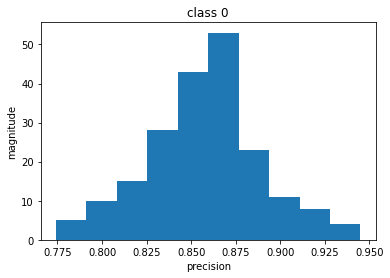

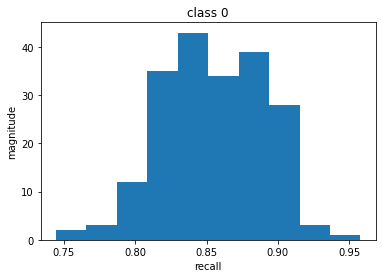

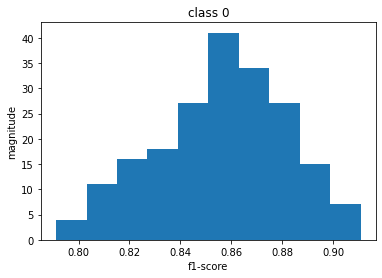

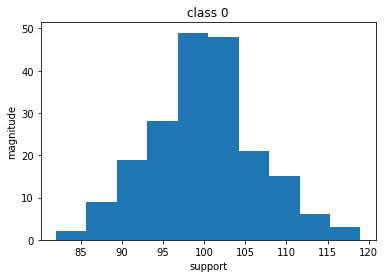

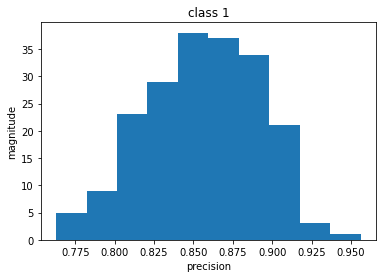

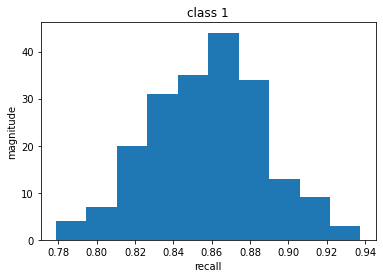

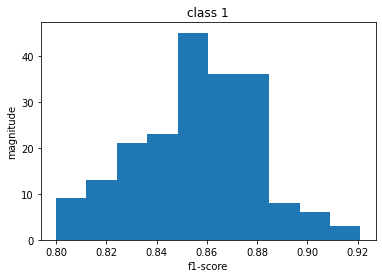

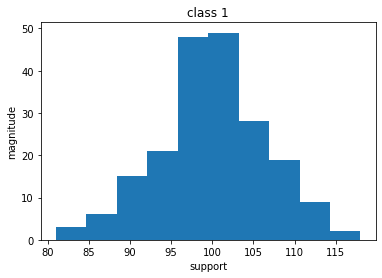

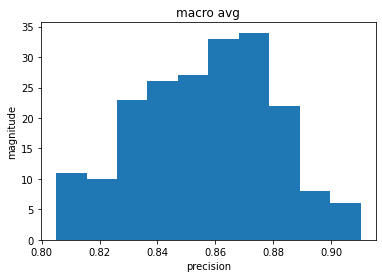

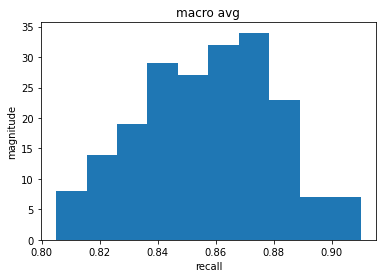

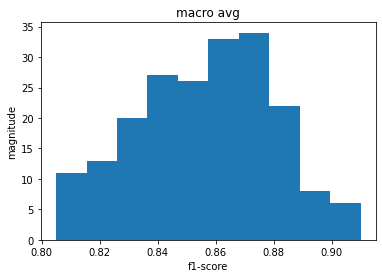

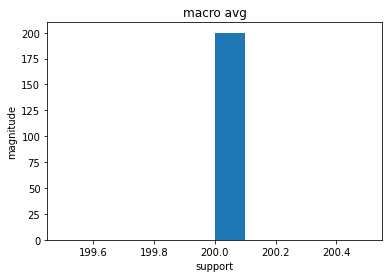

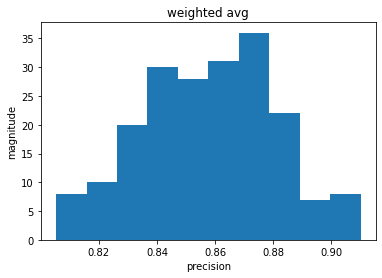

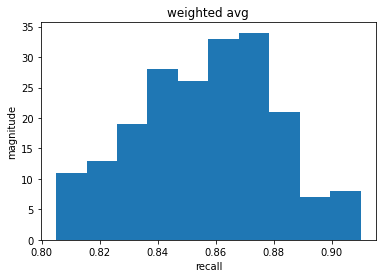

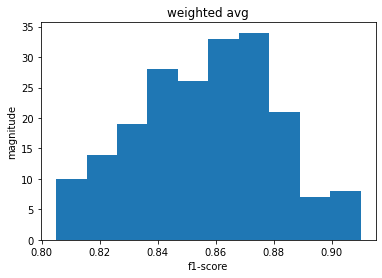

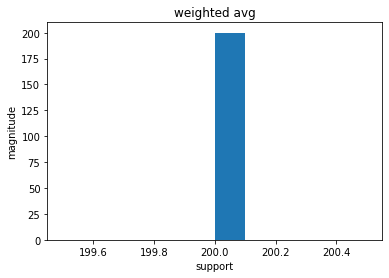

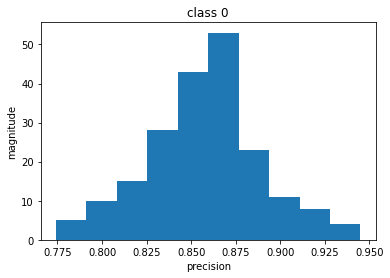

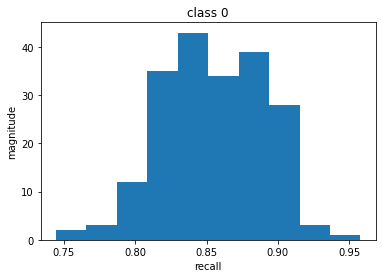

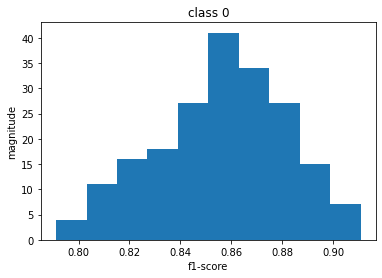

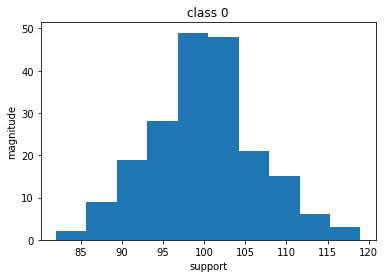

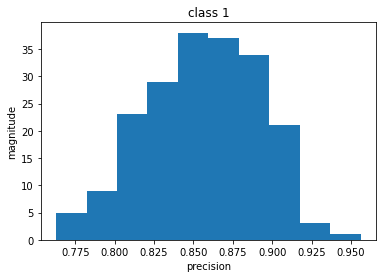

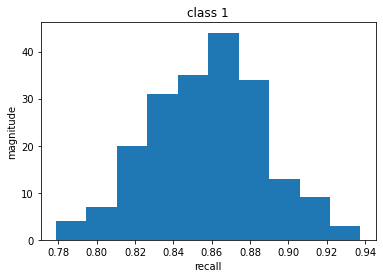

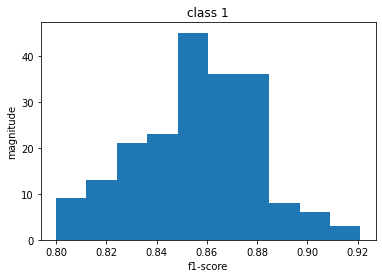

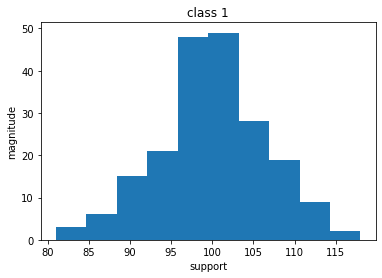

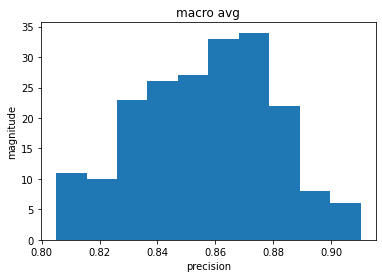

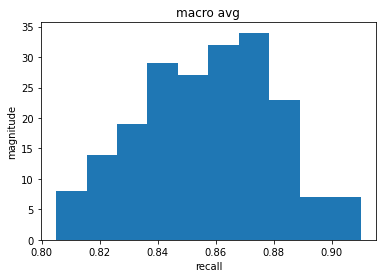

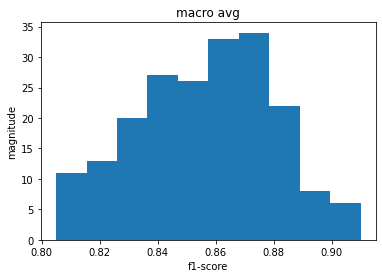

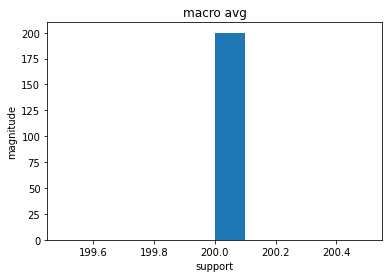

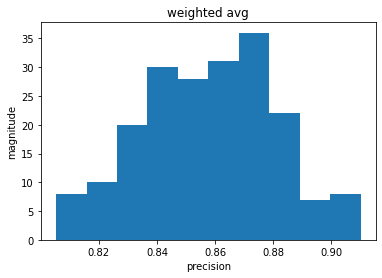

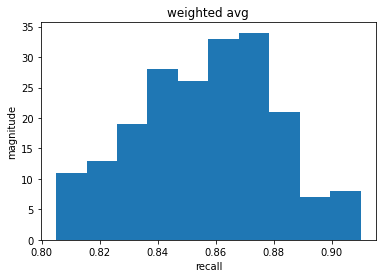

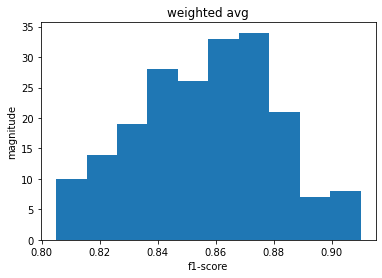

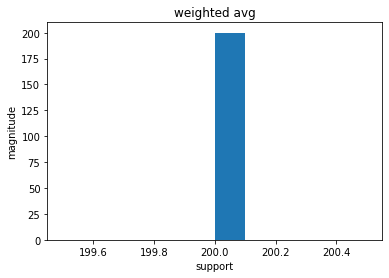

In [3]:
viz_one.visualize_classification(save_plots=True, formatting="png")
viz_two.visualize_classification(save_plots=True, formatting="png")

In [4]:
# check
recover_seeds = RecoverSeeds()

recover_seeds.compare_images(
    "images/class 0f1-score.png", 
    "alt_images/class 0f1-score.png"
)

{'mse': 0.0, 'ssim': 1.0}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from randomizer_ml.trainer import RegressionTrainer, ClassificationTrainer, EvaluateModel
from randomizer_ml.utils import RecoverSeeds
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from randomizer_ml.visualizer import Visualizer
import pandas as pd
import numpy as np
import time
import shutil
import os

clf = LogisticRegression()
X, y = make_classification(
    n_samples=2000,  n_features=100,
    n_informative=90, n_redundant=2,
    random_state=0
)
X = pd.DataFrame(X)
y = pd.Series(y)

loops = []
for index in range(10000):
    start = time.time()
    if os.path.exists("images_test"):
        shutil.rmtree("images_test")
    num_trials = 200
    
    clf_eval = EvaluateModel("classification", clf, X, y, num_trials)
    model_instances_two = clf_eval.fit_random("random")
    viz = Visualizer(
        model_instances_two, 
        "classification", 
        coef_names=X.columns.tolist(),
        output_dir="images_test/"
    )
    viz.visualize_classification(show_plot=False, save_plots=True, formatting="png")
    
    recover_seeds = RecoverSeeds()

    result = recover_seeds.compare_images(
        "images/class 0f1-score.png", 
        "images_test/class 0f1-score.png"
    )
    if np.allclose(result["mse"], 0) or np.allclose(result["ssim"], 1):
        print("seeds recovered!!!")
        break
    finished_loop = time.time() - start
    loops.append(finished_loop)
    index += 1
    print(f"took {finished_loop} seconds")
    print(f"average loop time is {sum(loops)/index}")

took 7.717517137527466 seconds
average loop time is 7.717517137527466
took 8.113379955291748 seconds
average loop time is 7.915448546409607
took 8.479668855667114 seconds
average loop time is 8.103521982828775
took 9.0596022605896 seconds
average loop time is 8.342542052268982
took 9.529299020767212 seconds
average loop time is 8.579893445968628
took 9.93313217163086 seconds
average loop time is 8.805433233579
took 10.224812030792236 seconds
average loop time is 9.00820163318089
took 10.665462017059326 seconds
average loop time is 9.215359181165695
took 11.48108696937561 seconds
average loop time is 9.467106713189018
took 11.60859990119934 seconds
average loop time is 9.681256031990051
took 12.115522146224976 seconds
average loop time is 9.902552951465953
took 12.50098204612732 seconds
average loop time is 10.1190887093544
took 12.591649055480957 seconds
average loop time is 10.309285659056444
took 13.293296098709106 seconds
average loop time is 10.522429261888776
took 13.6269423961639